In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 0: Set up the SimpleNN model
As you have practiced to implement neural networks in Homework 1, we just prepare the implementation for you.

In [ ]:
# import necessary dependencies
import argparse
import os, sys
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
import time
import datetime
from tqdm import tqdm_notebook as tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
def swish(x):
    return x/(1+torch.exp(-x))

In [ ]:
# define the Resnet20 mode;
class Resnet20(nn.Module):
    def __init__(self):
        super(Resnet20, self).__init__()
        self.conv0 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.batchnorm0 = nn.BatchNorm2d(16)
        
        self.conv1a = nn.Conv2d(16, 16, 3, padding=1)
        self.batchnorm1a = nn.BatchNorm2d(16)
        self.conv1b = nn.Conv2d(16, 16, 3, padding=1)
        self.batchnorm1b = nn.BatchNorm2d(16)
        self.conv1c = nn.Conv2d(16, 16, 3, padding=1)
        self.batchnorm1c = nn.BatchNorm2d(16)
        self.conv1d = nn.Conv2d(16, 16, 3, padding=1)
        self.batchnorm1d = nn.BatchNorm2d(16)
        self.conv1e = nn.Conv2d(16, 16, 3, padding=1)
        self.batchnorm1e = nn.BatchNorm2d(16)
        self.conv1f = nn.Conv2d(16, 16, 3, padding=1)
        self.batchnorm1f = nn.BatchNorm2d(16)
        
        self.conv1_2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)
        self.batchnorm1_2 = nn.BatchNorm2d(32)
        self.bypass1_2 = nn.Conv2d(16, 32, 1, stride=2)
        self.conv2a = nn.Conv2d(32, 32, 3, padding=1)
        self.batchnorm2a = nn.BatchNorm2d(32)
        self.conv2b = nn.Conv2d(32, 32, 3, padding=1)
        self.batchnorm2b = nn.BatchNorm2d(32)
        self.conv2c = nn.Conv2d(32, 32, 3, padding=1)
        self.batchnorm2c = nn.BatchNorm2d(32)
        self.conv2d = nn.Conv2d(32, 32, 3, padding=1)
        self.batchnorm2d = nn.BatchNorm2d(32)
        self.conv2e = nn.Conv2d(32, 32, 3, padding=1)
        self.batchnorm2e = nn.BatchNorm2d(32)
        
        self.conv2_3 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.batchnorm2_3 = nn.BatchNorm2d(64)
        self.bypass2_3 = nn.Conv2d(32, 64, 1, stride=2)
        self.conv3a = nn.Conv2d(64, 64, 3, padding=1)
        self.batchnorm3a = nn.BatchNorm2d(64)
        self.conv3b = nn.Conv2d(64, 64, 3, padding=1)
        self.batchnorm3b = nn.BatchNorm2d(64)
        self.conv3c = nn.Conv2d(64, 64, 3, padding=1)
        self.batchnorm3c = nn.BatchNorm2d(64)
        self.conv3d = nn.Conv2d(64, 64, 3, padding=1)
        self.batchnorm3d = nn.BatchNorm2d(64)
        self.conv3e = nn.Conv2d(64, 64, 3, padding=1)
        self.batchnorm3e = nn.BatchNorm2d(64)
        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        # Inital convolution
        out = self.batchnorm0(self.conv0(x))
        out = bypass = swish(out)
        # Block 1   (condense block layers into functions)
            # Layer 1
        out = self.batchnorm1a(self.conv1a(out))
        out = swish(out)
        out = self.batchnorm1b(self.conv1b(out))
        out = bypass = swish(out + bypass)
            # Layer 2
        out = self.batchnorm1c(self.conv1c(out))
        out = swish(out)
        out = self.batchnorm1d(self.conv1d(out))
        out = bypass = swish(out + bypass)
            # Layer 3
        out = self.batchnorm1e(self.conv1e(out))
        out = swish(out)
        out = self.batchnorm1f(self.conv1f(out))
        out = bypass = swish(out + bypass)
        # Block 2
            # Layer 1
        bypass = self.bypass1_2(bypass)
        out = self.batchnorm1_2(self.conv1_2(out))
        out = swish(out)
        out = self.batchnorm2a(self.conv2a(out))
        out = bypass = swish(out + bypass)
            # Layer 2
        out = self.batchnorm2b(self.conv2b(out))
        out = swish(out)
        out = self.batchnorm2c(self.conv2c(out))
        out = bypass = swish(out + bypass)
            # Layer 3
        out = self.batchnorm2d(self.conv2d(out))
        out = swish(out)
        out = self.batchnorm2e(self.conv2e(out))
        out = bypass = swish(out + bypass)
        # Block 3
            # Layer 1
        bypass = self.bypass2_3(bypass)
        out = self.batchnorm2_3(self.conv2_3(out))
        out = swish(out)
        out = self.batchnorm3a(self.conv3a(out))
        out = bypass = swish(out + bypass)
            # Layer 2
        out = self.batchnorm3b(self.conv3b(out))
        out = swish(out)
        out = self.batchnorm3c(self.conv3c(out))
        out = bypass = swish(out + bypass)
            # Layer 3
        out = self.batchnorm3d(self.conv3d(out))
        out = swish(out)
        out = self.batchnorm3e(self.conv3e(out))
        out = bypass = swish(out + bypass)
        
        # Global Average Pool to go from 8x8 -> 1x1 feature maps
        out = F.avg_pool2d(out, 8)
        
        # Fully Connected Layer
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        
        return out

In [ ]:
# define the SimpleNN mode;
class ResNet_Block(nn.Module):
    def __init__(self, in_chs, out_chs, strides):
        super(ResNet_Block, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=in_chs, out_channels=out_chs,
                      stride=strides, padding=1, kernel_size=3, bias=False),
            nn.BatchNorm2d(out_chs),
            nn.ReLU(True)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=out_chs, out_channels=out_chs,
                      stride=1, padding=1, kernel_size=3, bias=False),
            nn.BatchNorm2d(out_chs)
        )

        if in_chs != out_chs:
            self.id_mapping = nn.Sequential(
                nn.Conv2d(in_channels=in_chs, out_channels=out_chs,
                          stride=strides, padding=0, kernel_size=1, bias=False),
                nn.BatchNorm2d(out_chs))
        else:
            self.id_mapping = None
        self.final_activation = nn.ReLU(True)

    def forward(self, x):
        out = self.conv1(x)
        out = self.conv2(out)
        if self.id_mapping is not None:
            x_ = self.id_mapping(x)
        else:
            x_ = x
        return self.final_activation(x_ + out)

class ResNetCIFAR(nn.Module):
    def __init__(self, num_layers=20, num_stem_conv=16, config=(16, 32, 64)):
        super(ResNetCIFAR, self).__init__()
        self.num_layers = num_layers
        self.head_conv = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=num_stem_conv,
                      stride=1, padding=1, kernel_size=3, bias=False),
            nn.BatchNorm2d(num_stem_conv),
            nn.ReLU(True)
        )
        num_layers_per_stage = (num_layers - 2) // 6
        self.body_op = []
        num_inputs = num_stem_conv
        for i in range(len(config)):
            for j in range(num_layers_per_stage):
                if j == 0 and i != 0:
                    strides = 2
                else:
                    strides = 1
                self.body_op.append(ResNet_Block(num_inputs, config[i], strides))
                num_inputs = config[i]
        self.body_op = nn.Sequential(*self.body_op)
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.final_fc = nn.Linear(config[-1], 10)

    def forward(self, x):
        out = self.head_conv(x)
        out = self.body_op(out)
        self.features = self.avg_pool(out)
        self.feat_1d = self.features.mean(3).mean(2)
        return self.final_fc(self.feat_1d)


In [ ]:
# specify the device for computation
#############################################
# your code here

device = 'cuda' if torch.cuda.is_available() else 'cpu'
#device = 'cpu'
net = Resnet20()
net = net.to(device)
if device == 'cuda':
    print("Train on GPU...")
else:
    print("Train on CPU...")
    
#############################################

Train on GPU...


In [ ]:
import torch
if torch.cuda.is_available():
  print("yes")

yes


In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt

import torch.nn.functional as F


In [ ]:
def softmax(val, T =1000):
  x = val.cpu().detach()
  out = torch.zeros(x.size())

  for i in range(len(out)):
    sum = 0
    for j in range(len(out[0])):
      out[i][j] = np.exp(x[i][j]/T)
      sum+= out[i][j]
    out[i] = out[i]/sum
  return out

  
  

In [ ]:
import torchvision
import torchvision.transforms as transforms
transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.datasets import CIFAR100
DATA_ROOT = "drive/My Drive/ECE661/data"
OOD_Data = CIFAR100(
    root=DATA_ROOT,
    train=False,
    transform=transform_val,
    download=True
)
ID_Data = CIFAR10(
    root=DATA_ROOT,
    train=False,
    transform=transform_val,
    download=True
)

ID_loader = DataLoader(
    ID_Data, 
    batch_size=200, # your code
    shuffle=False, # your code
    num_workers=1
)
OOD_loader = DataLoader(
    OOD_Data, 
    batch_size=200, # your code
    shuffle=False, # your code
    num_workers=1
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
from torchvision.datasets import SVHN

SVHN_OOD_Data = SVHN(
    root=DATA_ROOT,
    split="test",
    transform=transform_val,
    download=True
)
SVHN_OOD_loader = DataLoader(
    SVHN_OOD_Data, 
    batch_size=200, # your code
    shuffle=False, # your code
    num_workers=1
)

Using downloaded and verified file: drive/My Drive/ECE661/data/test_32x32.mat


In [ ]:
from torchvision.datasets import MNIST
transform_MNIST = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda inputs1: inputs1.repeat(3, 1, 1) ),
    transforms.RandomCrop(32, padding=2),
    transforms.Normalize((0.4914), (0.2023)),
    
])
MNIST_OOD_Data = MNIST(
    root=DATA_ROOT,
    train=False,
    transform=transform_MNIST,
    download = True

)
MNIST_OOD_loader = DataLoader(
    MNIST_OOD_Data, 
    batch_size=200, # your code
    shuffle=False, # your code
    num_workers=1
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting drive/My Drive/ECE661/data/MNIST/raw/train-images-idx3-ubyte.gz to drive/My Drive/ECE661/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting drive/My Drive/ECE661/data/MNIST/raw/train-labels-idx1-ubyte.gz to drive/My Drive/ECE661/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting drive/My Drive/ECE661/data/MNIST/raw/t10k-images-idx3-ubyte.gz to drive/My Drive/ECE661/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting drive/My Drive/ECE661/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to drive/My Drive/ECE661/data/MNIST/raw



In [ ]:
from torch.utils.data import Subset
rndimg_mean = (136.289, 129.273,122.668)
rndimg_std  = (49.770, 49.016, 49.5022508)
OOD_BATCH_SIZE = 256
tensor_transform_train = transforms.Compose([transforms.Normalize(rndimg_mean, rndimg_std)])

class OODTensorDataset:
    def __init__(self, tensor_data, transforms=None):
        self.tensors = tensor_data
        self.transforms = transforms
    
    def __getitem__(self, index):   
        x = self.tensors[index]
        if self.transforms:
            x = self.transforms(x)
        return x, -1                 # returing -1 for OOD labels to signify that they dont matter
    
    def __len__(self):
        return self.tensors.size()[0]


RANDOM_IMGS = 'drive/My Drive/ECE661/data/300K_random_images.npy'
# construct dataset
random_images_data = torch.permute(torch.from_numpy(np.load(RANDOM_IMGS)), (0,3,1,2)).float()  
_, random_images_data = torch.split(random_images_data, [299000, 1000])
random_images_data = torch.tensor(random_images_data)
rand_img_set = OODTensorDataset(
    random_images_data,
    tensor_transform_train
)


# construct dataloader
train_loader_rand_ood = DataLoader(
    rand_img_set,
    batch_size = OOD_BATCH_SIZE,
    shuffle = True
)


<ipython-input-13-72d0dd6a423e>:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  random_images_data = torch.tensor(random_images_data)


In [ ]:
print(random_images_data[0].shape)

torch.Size([3, 32, 32])


In [ ]:
net = Resnet20()
chkpnt = torch.load('drive/My Drive/ECE661/resnet20.pth',map_location ='cpu')['state_dict']
net.load_state_dict(chkpnt)
#chkpnt = torch.load('./resnet_new.h5')
#net.load_state_dict(chkpnt['net'])


net.cuda()
net.eval()
softmaxes = []
indexes = []

with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(ID_loader):
        inputs = inputs.to(device)
        y = net(inputs.cuda())
        softmaxes.append(softmax(y).amax(1).cpu())
        indexes.append(y.argmax(1).cpu())

indexes = torch.cat(indexes)
softmaxes = torch.cat(softmaxes)
total_examples = indexes.size()[0]


    

In [ ]:
def plot_true_pos(vals):
  TPRs = []
  opt = .95
  opt_x = 0
  opt_y = 0
  dist = 1000
  x_range = np.linspace(0.05, .15, 1000)
  for i in x_range:
    TPR = sum(vals > i)/len(vals)
    TPRs.append(TPR)
    if(np.abs(opt-TPR)<=dist):
      opt_x, opt_y, dist= i, TPR, (np.abs(opt-TPR))
  plt.plot( x_range,TPRs, 'm')
  plt.plot(opt_x, opt_y, 'X', ms=11, label="Threshold at 95%")
  plt.xlabel("Threshold")
  plt.ylabel("True Positive Rate")
  plt.title("In-Distribution Threshold for TPR")
  plt.legend()
  plt.show()
  print(f"Threshold at 95% = {opt_x}")

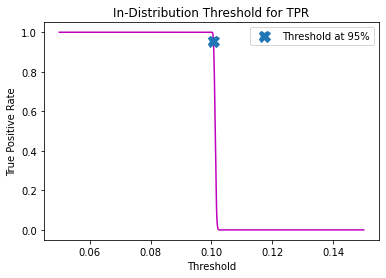

Threshold at 95% = 0.10065065065065065


In [ ]:
plot_true_pos(softmaxes)

In [ ]:
def plot_roc(ID_vals, OOD_vals, label ):
  TPRs = [0]*1000     #  true positive rates
  FPRs = [0]*1000     # false positive rates
  AUROC = [0]*1000    # will contain the AUROC approximation segments
  opt = .95
  opt2=.05
  opt1_TPR = 0
  opt1_FPR = 0
  distTPR = 1000
  opt2_TPR = 0
  opt2_FPR = 0
  distFPR = 1000
  prev_FPR = 0
  counter = 0
  for i in np.linspace(min([min(ID_vals), min(OOD_vals)]), max([max(ID_vals), max(OOD_vals)]), 1000):
      TPR = sum(OOD_vals < i)/len(OOD_vals)
      FPR = sum(ID_vals < i)/len(ID_vals)
      TPRs[counter]=TPR
      FPRs[counter]=FPR
      AUROC[counter]=(FPR-prev_FPR)*TPR
      counter+=1
      prev_FPR = FPR 
      if(np.abs(opt-TPR)<distTPR):
        opt1_TPR, opt1_FPR, distTPR= TPR, FPR, (np.abs(opt-TPR))
      if(np.abs(opt2-FPR)<distFPR):
        opt2_TPR, opt2_FPR, distFPR= TPR, FPR, (np.abs(opt2-FPR))
  plt.plot(FPRs, TPRs, label = label)

  print(label)
  print(f"FPR at 95%TPR = {opt1_FPR}")
  print(f"TNR at 95%TPR = {1-opt1_FPR}")
  print(f"AUROC: {sum(AUROC)}")
  print()

In [ ]:
def plot_dataset_rocs(ID_datasets, OOD_datasets, title, labels):
  space = np.linspace(0,1,1000)
  tpr95 = [.95]*1000
  plt.plot(space, tpr95, "k--", linewidth=.5, label = "TPR = 95%")
  plt.plot([0,1], [0,1], "k--", linewidth=.5)
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title(title)
  for i in range(len(OOD_datasets)):
    plot_roc(ID_datasets[i], OOD_datasets[i], labels[i])
  plt.legend()
  plt.show()


In [ ]:
dataset = train_loader_rand_ood
paths = ["inCifar10_resnet20.pth", "resnet10Cifar10.pth", "resnet30Cifar10.pth", "resnet20Cifar10wide.pth", "resnet20Cifar10narrow.pth"]
labels = ['Standard Resnet20', 'Resnet10', 'Resnet30', 'Wide Resnet20', 'Narrow Resnet20']
nets = [Resnet20(), ResNetCIFAR(num_layers=10), ResNetCIFAR(num_layers=30), ResNetCIFAR(num_layers=20, num_stem_conv=32, config=(32, 64, 128)), ResNetCIFAR(num_layers=20, num_stem_conv=8, config=(8, 16, 32))]
IDs = []
recalculate_ID = True
uniform, gaussian = False, False
OODs = []
dataset_size = 1000
for i in range(len(paths)):
  path = paths[i]
  net = nets[i]
  print(path)
  chkpnt = torch.load('drive/My Drive/ECE661/' + path,map_location ='cpu')['state_dict']
  net.load_state_dict(chkpnt)
  
  net.cuda()
  net.eval()
  softmaxes = []
  OOD_softmaxes = []
  if recalculate_ID:
    with torch.no_grad():
        for batch_idx, (inputs, targets) in enumerate(ID_loader):
            inputs = inputs.to(device)
            y = net(inputs.cuda())
            softmaxes.append(softmax(y).amax(1).cpu())

    softmaxes = torch.cat(softmaxes)
    IDs.append(softmaxes)
  if uniform:
    
    for i in range(dataset_size):
      x = np.random.uniform(0, 255, 3072).astype(np.float32)
      norm = np.linalg.norm(x)
      x = x/norm
      unif = torch.tensor(np.reshape(x, (1,3, 32, 32)))
      y = net(unif.cuda())
      OOD_softmaxes.append(softmax(y).amax(1).cpu())
  else:
    if gaussian:
      for i in range(dataset_size):
        x = np.random.normal(0, 255, 3072).astype(np.float32)
        normalized = np.linalg.norm(x)
        x = x/normalized
        norm = torch.tensor(np.reshape(x, (1,3, 32, 32)))
        y = net(norm.cuda())
        OOD_softmaxes.append(softmax(y).amax(1).cpu())
    else:
      with torch.no_grad():
          for batch_idx, (inputs, targets) in enumerate(dataset):
              inputs = inputs.to(device)
              y = net(inputs.cuda())
              OOD_softmaxes.append(softmax(y).amax(1).cpu())


  OOD_softmaxes = torch.cat(OOD_softmaxes)
  OODs.append(OOD_softmaxes)





inCifar10_resnet20.pth
resnet10Cifar10.pth
resnet30Cifar10.pth
resnet20Cifar10wide.pth
resnet20Cifar10narrow.pth


Standard Resnet20
FPR at 95%TPR = 0.43689998984336853
TNR at 95%TPR = 0.5630999803543091
AUROC: 0.8795957565307617

Resnet10
FPR at 95%TPR = 0.5421000123023987
TNR at 95%TPR = 0.4578999876976013
AUROC: 0.8381661772727966

Resnet30
FPR at 95%TPR = 0.4803999960422516
TNR at 95%TPR = 0.5196000337600708
AUROC: 0.8653783202171326

Wide Resnet20
FPR at 95%TPR = 0.41339999437332153
TNR at 95%TPR = 0.5866000056266785
AUROC: 0.880075991153717

Narrow Resnet20
FPR at 95%TPR = 0.4699000120162964
TNR at 95%TPR = 0.5300999879837036
AUROC: 0.8522252440452576



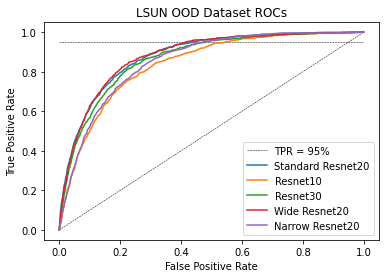

In [ ]:
plot_dataset_rocs(IDs, OODs, "ODIN LSUN OOD Dataset ROCs", labels)

In [ ]:

OOD_softmaxes = []
indexes = []

with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(OOD_loader):
        inputs = inputs.to(device)
        y = net(inputs.cuda())
        OOD_softmaxes.append(softmax(y).amax(1).cpu())
        indexes.append(y.argmax(1).cpu())

indexes = torch.cat(indexes)
OOD_softmaxes = torch.cat(OOD_softmaxes)
total_examples = indexes.size()[0]


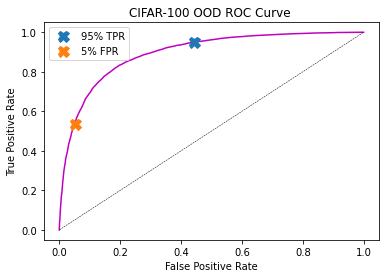

FPR at 95%TPR = 0.4440999925136566
TNR at 95%TPR = 0.555899977684021
TPR at 5%FPR = 0.5378000140190125
AUROC: 0.8946139812469482


In [ ]:
plot_roc(softmaxes, OOD_softmaxes, "CIFAR-100 OOD ROC Curve ")

In [ ]:

SVHN_OOD_softmaxes = []
indexes = []

with torch.no_grad():
    for batch_idx, (inputs, targets) in enumerate(SVHN_OOD_loader):
        inputs = inputs.to(device)
        y = net(inputs.cuda())
        SVHN_OOD_softmaxes.append(softmax(y).amax(1).cpu())
        indexes.append(y.argmax(1).cpu())

indexes = torch.cat(indexes)
SVHN_OOD_softmaxes = torch.cat(SVHN_OOD_softmaxes)
total_examples = indexes.size()[0]

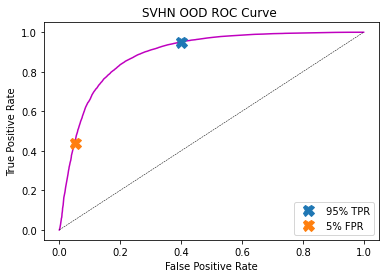

FPR at 95%TPR = 0.4011000096797943
TNR at 95%TPR = 0.5988999605178833
TPR at 5%FPR = 0.4413798451423645
AUROC: 0.8902412056922913


In [ ]:
plot_roc(softmaxes, SVHN_OOD_softmaxes, "SVHN OOD ROC Curve ")

In [ ]:
plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
MNIST_OOD_softmaxes = []
indexes = []

with torch.no_grad():
    for batch_idx, (inputs1, targets1) in enumerate(MNIST_OOD_loader):
        inputs1 = inputs1.to(device)
        y = net(inputs1.cuda())
        MNIST_OOD_softmaxes.append(softmax(y).amax(1).cpu())
        indexes.append(y.argmax(1).cpu())

indexes = torch.cat(indexes)
MNIST_OOD_softmaxes = torch.cat(MNIST_OOD_softmaxes)
total_examples = indexes.size()[0]

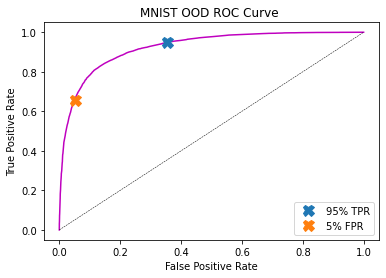

FPR at 95%TPR = 0.3547999858856201
TNR at 95%TPR = 0.6452000141143799
TPR at 5%FPR = 0.6593999862670898
AUROC: 0.924077570438385


In [ ]:
plot_roc(softmaxes, MNIST_OOD_softmaxes, "MNIST OOD ROC Curve ")

In [ ]:
from sklearn import preprocessing
dataset_size = 1000
UNIF_OOD_softmaxes = []
for i in range(dataset_size):
  x = np.random.uniform(0, 255, 3072).astype(np.float32)
  norm = np.linalg.norm(x)
  x = x/norm
  unif = torch.tensor(np.reshape(x, (1,3, 32, 32)))
  y = net(unif.cuda())
  UNIF_OOD_softmaxes.append(softmax(y).amax(1).cpu())

UNIF_OOD_softmaxes = torch.cat(UNIF_OOD_softmaxes)


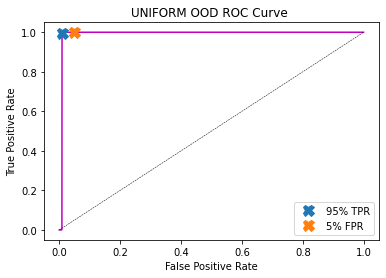

FPR at 95%TPR = 0.008799999952316284
TNR at 95%TPR = 0.9911999702453613
TPR at 5%FPR = 1.0
AUROC: 0.9912489652633667


In [ ]:
plot_roc(softmaxes, UNIF_OOD_softmaxes, "UNIFORM OOD ROC Curve ")

In [ ]:
GAUSSIAN_OOD_softmaxes = []
for i in range(100):
  x = np.random.normal(0, 255, 3072).astype(np.float32)
  normalized = np.linalg.norm(x)
  x = x/normalized
  norm = torch.tensor(np.reshape(x, (1,3, 32, 32)))
  y = net(norm.cuda())
  GAUSSIAN_OOD_softmaxes.append(softmax(y).amax(1).cpu())

GAUSSIAN_OOD_softmaxes = torch.cat(GAUSSIAN_OOD_softmaxes)


[tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6]), tensor([6])

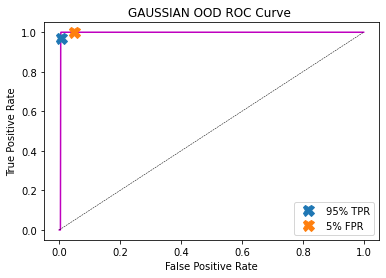

FPR at 95%TPR = 0.004699999932199717
TNR at 95%TPR = 0.9952999949455261
TPR at 5%FPR = 1.0
AUROC: 0.995730996131897


In [ ]:
plot_roc(softmaxes, GAUSSIAN_OOD_softmaxes, "GAUSSIAN OOD ROC Curve ")

In [ ]:
pip install lmdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow_datasets as tfds
ds = tfds.load('lsun', split='test')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

KeyboardInterrupt: ignored

In [ ]:

transform_LSUN = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda inputs1: inputs1.repeat(3, 1, 1) ),
    transforms.RandomCrop(32, padding=2),
    transforms.Normalize((0.4914), (0.2023)),
    
])

scriptdir = os.path.dirname(__file__)


LSUN_OOD_Data = LSUN(
    root=DATA_ROOT,
    classes='test',
    transform=transform_LSUN,

)
LSUN_OOD_loader = DataLoader(
    MNIST_OOD_Data, 
    batch_size=200, # your code
    shuffle=False, # your code
    num_workers=1
)

Error: ignored